In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf



# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
raw_dataframe = pd.read_csv('new_york_by_city_2013_crime.csv')

In [3]:
dataframe = raw_dataframe.copy()

In [4]:
# nothing contained within this column
dataframe = dataframe.drop(dataframe.columns[4], axis=1)

In [5]:
# removes superscripts from column headers
dataframe.rename(columns = {list(dataframe)[4]: 'Rape', 
                            'Arson3': 'Arson', 
                            list(dataframe)[3]: 'Murder/Manslaughter', 
                            list(dataframe)[2]: 'Violent Crime', 
                            list(dataframe)[7]: 'Property Crime'}, inplace=True)

In [6]:
# changes population and robbery columns to int types

for value in ['Population', 'Robbery', 'Violent Crime', 'Property Crime', 'Rape', 'Burglary']:
    dataframe[value] = dataframe[value].str.replace(',', '').astype(int)

In [7]:
dataframe['Population'].sort_values(ascending=False)[:5] # extreme outlier at the top
#sns.distplot(dataframe['Population'])

216    8396126
35      258789
272     210562
346     199134
310     143834
Name: Population, dtype: int32

In [8]:
df = dataframe.drop(dataframe.index[216])

In [9]:
df['Population Squared'] = df['Population'] ** 2

In [10]:
murders_happened = (df['Murder/Manslaughter'] > 1)
robberies_happened = (df['Robbery'] > 1)

In [11]:
# add boolean columns for murders and robberies
df['Murders Happened'] = murders_happened
df['Robberies Happened'] = robberies_happened

## Holdout groups

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [13]:
keywords = ['Population', 'Murder/Manslaughter', 'Population Squared']
target = df['Property Crime']
data = df[keywords]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.4, random_state=0)

In [15]:
# Instantiate our model.
regr = linear_model.LinearRegression()


# minus 1 is computed by the system itself
#Y = df['Property Crime'].values.reshape(-1, 1)
#X = df[['Population', 'Murder/Manslaughter', 'Population Squared']]

regr.fit(X_train, y_train)


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))


Coefficients: 
 [  1.55029818e-02   1.78129299e+02   2.03545553e-10]
Mean squared error: 71964.77
Variance score: 0.92


In [16]:
print(regr.intercept_)

35.8668393305


In [17]:
cdf = pd.DataFrame(regr.coef_, X_train.columns, columns=['Coeff'])

In [18]:
cdf

,Coeff
Population,0.016
Murder/Manslaughter,178.129
Population Squared,0.000


In [19]:
predictions = regr.predict(X_test)

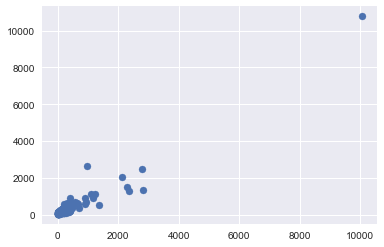

In [20]:
plt.scatter(y_test, predictions)

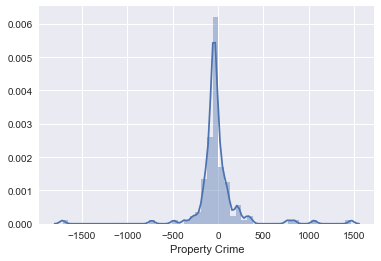

In [21]:
sns.distplot(y_test - predictions)

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
X_train.shape, y_train.shape

((208, 3), (208,))

In [24]:
X_test.shape, y_test.shape

((139, 3), (139,))

In [40]:
svr_lin = svm.SVR(kernel='linear', C=1e3)

In [50]:
X_train_mat = X_train.as_matrix()

In [49]:
y_train_values = y_train.values

In [51]:
X_test_mat = X_test.as_matrix()

In [ ]:
svr_lin.fit(X_train_mat, y_train_values).predict(X_test_matrix)